# Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.neural_network import MLPRegressor as rede_neural
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from scipy.stats import f_oneway
from sklearn.model_selection import GridSearchCV
import Classes as Cls

# Funções

## Resultados ULSR

In [24]:
def resultados(datafile,n,modelos,indice):

  a=[]
  
  for i in range(n):
      

      Modelo_pi = Cls.ulsr(datafile)
      
      mdl = modelos.modelos[indice]
      mdl.fit(modelos.x_transformed,modelos.y_transformed.ravel())


      y_demanda=modelos.y_scale.inverse_transform(np.array(mdl.predict(modelos.x_scale.fit_transform([[j] for j in range(52)]))).reshape(52,1))

      Modelo_pi.Construir(y_demanda)
      Modelo_pi.Otimizar()
      a.append(Modelo_pi.Resultados())


  return a

## Plot

In [3]:
def plot_(resultados_dataframe1,resultados_dataframe2 = False):
  aux_bool = True
  if(type(resultados_dataframe2)==type(aux_bool)):
    resultados_dataframe2 = resultados_dataframe1
    aux_bool = False


  fig=plt.figure(figsize=(10,8))
  plt.subplots_adjust(wspace=0.1, hspace=0.3)
  fig.suptitle('Distribuição das Distâncias Entre os Pontos')

  numb=1
  dist = {}
  for coluna in list(resultados_dataframe1)[:6]:
    dist_aux=[]
    ax=fig.add_subplot(2,3,numb)
    ax.set_title(coluna)
    for i in range(len(resultados_dataframe1[coluna])):
      if(aux_bool):
        i = 0
      else:
        i = i
      for j in range(i,len(resultados_dataframe2[coluna])):
        dist_aux.append(np.linalg.norm(np.array(resultados_dataframe1.loc[i,coluna]) - np.array(resultados_dataframe2.loc[j,coluna])))
    sns.histplot(dist_aux, kde=True, element='step')
    plt.tick_params(axis='y', labelsize=0, length=0)
    plt.ylabel([], fontsize=0)
    plt.xlabel('Distância')
    dist[coluna] = dist_aux
    numb+=1
  plt.show()
  return pd.DataFrame(dist)

# Criação dos modelos de aprendizado

In [8]:
n=10

funcao_demanda = lambda i,j: [(i*6-j*2)**2+10000]

x = [[j] for j in range(52) for i in range(n)]

y = pd.read_csv('demandas')['y'].values

In [9]:
modelos = Cls.modelos_regressor([RandomForestRegressor(n_estimators=10),rede_neural()],
                            x,y)

In [10]:
modelos.Transformar()

In [11]:
modelos.Treinar()
modelos.Avaliar()

In [12]:
resultados = pd.DataFrame({'Random forest': modelos.medias_desempenho[0],
                           'Rede Neural': modelos.medias_desempenho[1],})

[]

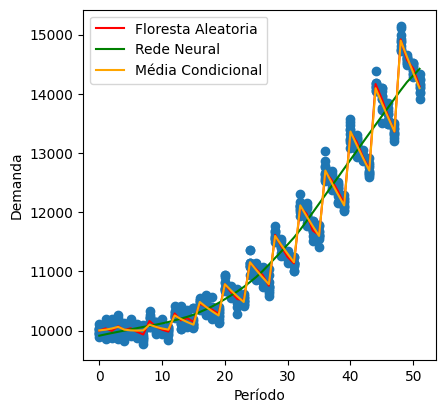

In [14]:
fig=plt.figure(figsize=(10,10))

x_unique = [[i] for i in range(52)]

medias_reais = [funcao_demanda(i,j) for i in range(13) for j in range(1,5)]

ax=fig.add_subplot(2,2,1)
plt.scatter(x,y)
plt.plot(x_unique,modelos.y_scale.inverse_transform(modelos.Predizer(0,x_unique).reshape(-1,1)),color='red',label='Floresta Aleatoria')

plt.plot(x_unique,modelos.y_scale.inverse_transform(modelos.Predizer(1,x_unique).reshape(-1,1)),color='green',label='Rede Neural')

plt.plot(x_unique,medias_reais,color='orange',label='Média Condicional')

plt.ylabel('Demanda')
plt.xlabel('Período')


plt.legend()
plt.plot()

[]

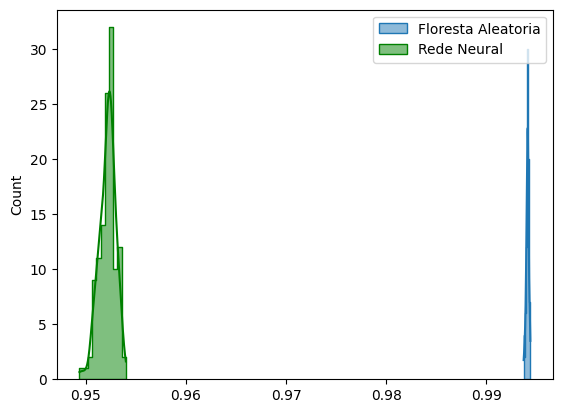

In [15]:
sns.histplot(modelos.medias_desempenho[0], kde=True, element='step',label='Floresta Aleatoria')
sns.histplot(modelos.medias_desempenho[1], kde=True, element='step',color='green',label='Rede Neural')
plt.legend()
plt.plot()

In [16]:
resultados.describe()

,Random forest,Rede Neural
count,120.000000,120.000000
mean,0.994098,0.952160
std,0.000140,0.000814
min,0.993716,0.949373
25%,0.994019,0.951624
50%,0.994109,0.952256
75%,0.994184,0.952669
max,0.994387,0.954008


## Analise de Normalidade dos dados de desempenho médio

In [17]:
alpha = 0.05
p={}
_,p['Random Forest'] = shapiro(modelos.medias_desempenho[0])
_,p['Rede Neural'] = shapiro(modelos.medias_desempenho[1])
for i in p:
    if p[i] <= alpha:
        print(f'Média amostral de desempenho da {i} não segue uma normal')
    else:
        print(f'Média amostral de desempenho da {i} segue uma normal')

Média amostral de desempenho da Random Forest segue uma normal
Média amostral de desempenho da Rede Neural segue uma normal


## Analise de comparação dos dados de desempenho médio

In [18]:
_,aux = f_oneway(modelos.medias_desempenho[0],modelos.medias_desempenho[1])

In [19]:
if aux < alpha:  
    print("A hipotese nula pode ser rejeitada. Dados provem de distribuição diferentes")
else:
    print("A hipotese nula não pode ser rejeitada. Dados provem da mesma distribuição")

A hipotese nula pode ser rejeitada. Dados provem de distribuição diferentes


# Resultados Modelo PI

## Criação

In [22]:
datafile = "UFL_instancia.txt"

In [25]:
resultados_dataframe_1 = pd.DataFrame(resultados(datafile,200,modelos,0))
resultados_dataframe_2 = resultados(datafile,200,modelos,1)

Restricted license - for non-production use only - expires 2024-10-28


## Analise das Distancias Entre os Pontos

### distancia entre os pontos provindos dos resultados do Random Forest, ou seja, as demandas foram obtidas pelo Random forest

In [ ]:
dist_1 = plot_(resultados_dataframe_1)

In [ ]:
dist_1.describe()

### distancia entre os pontos provindos dos resultados da Rede Neural, ou seja, as demandas foram obtidas pelo Rede Neural

In [ ]:
dist_2 = plot_(resultados_dataframe_2)

In [ ]:
dist_2.describe()

In [ ]:
np.quantile(np.array(dist_2['x']), 0.9)

### distancia entre os pontos provindos dos resultados do Random Forest e entre da Rede Neural

In [ ]:
dist_3 = plot_(resultados_dataframe_1,resultados_dataframe_2)

In [ ]:
dist_3.describe()

In [ ]:
np.quantile(np.array(dist_3['xr']), 0.98)

## Analise dos valores objetivos obtidos


In [ ]:
fig=plt.figure(figsize=(5,4.5))
fig.suptitle('Distribuição dos Valores Objetivos')

sns.histplot(resultados_dataframe_2['ObjVal'], kde=True, element='step',label='Floresta Aleatoria')
sns.histplot(resultados_dataframe_1['ObjVal'], kde=True, element='step',color='green',label='Rede Neural')
plt.legend()
plt.ylabel([], fontsize=0)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.plot()

Random Forest

In [ ]:
resultados_dataframe_1['ObjVal'].describe()

Rede Neural

In [ ]:
resultados_dataframe_2['ObjVal'].describe()

In [ ]:
alpha = 0.05
p={}
_,p['Random Forest'] = shapiro(resultados_dataframe_1['ObjVal'])
_,p['Rede Neural'] = shapiro(resultados_dataframe_2['ObjVal'])
for i in p:
    if p[i] <= alpha:
        print(f'Média amostral de desempenho da {i} não segue uma normal')
    else:
        print(f'Média amostral de desempenho da {i} segue uma normal')

In [ ]:
_,aux = f_oneway(resultados_dataframe_1['ObjVal'].values,resultados_dataframe_2['ObjVal'].values)

In [ ]:
if aux < alpha:  
    print("A hipotese nula pode ser rejeitada. Dados provem de distribuições diferentes")
else:
    print("A hipotese nula não pode ser rejeitada. Dados provem da mesma distribuição")